# Bungee Characterization
## PH 211 Lab
### January 21, 2021
### Zachary Bochanski

The purpose of this notebook is for documenting the experience of modeling bungee characteristics through physics. This lab is an exercise in imporving the collection of data, storing it in variables using python, and making conclusions.

### Data collection procedure

1. Secure rubber band to rack/shelf

2. Measure rubber band length and attatch (hook) weigts.

3. Record length (ruler) and weight (w/ scale) for each object added to band

![collecting_data](https://github.com/ztbochanski/physics-211/raw/main/images/bungee_lab.jpg)


### Imports

Numpy for math operations
Matplotlib for visualizations 

In [1]:
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt

### Lab Data

Lab data is recorded in two python lists: 

- band_length_cm: Rubber band length in cm. 
- mass_on_band_g: Mass applied to the band in grams. 

For example, the rubber band length at rest is 5.5cm and the weight applied is 0g.

Data is entered by manually entering each set of measurements and appedning them to the respective list. Using 6 points to measure the "stretch," these 6 points increase in about 60g intervals to 350g where the rubber band seems like its about to break. This breaking-point seems like a good spot to stop and a possible maximum force the rubber band can withstand.

In [204]:
# Initialize lists for recording data
band_length_cm = [] # dependent variable
mass_on_band_g = [] # independent variable

# Record data points measuring the length and weight of the object added to the band

# Session 1: at rest
band_length_cm.append(5.5)
mass_on_band_g.append(0)

# Session 2: hook 1
band_length_cm.append(7)
mass_on_band_g.append(0+57)

# session 3: hook 2
band_length_cm.append(8.4)
mass_on_band_g.append(0+57+46)

# session 4: hook 3
band_length_cm.append(9.8)
mass_on_band_g.append(0+57+46+61)

# session 5: hook 4
band_length_cm.append(13.1)
mass_on_band_g.append(0+57+46+61+66)

# session 6: hook 5
band_length_cm.append(15.2)
mass_on_band_g.append(0+57+46+61+66+54)

# session 7: hook 6
band_length_cm.append(17.4)
mass_on_band_g.append(0+57+46+61+66+54+57)

# barrowing Bruce's code to check data set lengths
xdata1length = len(mass_on_band_g)
ydata1length = len(band_length_cm)

# print out the lengths- visually check that they are the same
print("number of data points (x):", xdata1length)
print("number of data points (y):", ydata1length)

if (xdata1length == ydata1length):
    print("Looks good:)")
else:
    print("Something is wrong here!!!")


# Display data in a table: table header, setup
header = ["Length (cm)", "Mass (g)"]
line = '-' * 20

# Print table
print(line)
print('{:<12s}{:>4s}'.format(header[0],header[1]))
print(line)
for i in range(len(band_length_cm)):
    print('{:>10.1f}{:>9d}'.format(band_length_cm[i],mass_on_band_g[i]))
print(line)

number of data points (x): 7
number of data points (y): 7
Looks good:)
--------------------
Length (cm) Mass (g)
--------------------
       5.5        0
       7.0       57
       8.4      103
       9.8      164
      13.1      230
      15.2      284
      17.4      341
--------------------


### Taking a look at the data collected

The data shows a general increase of approx 2cm per 50 to 60g added, no points look absurd at first glance. Next sept is applying some statistical analysis to the data.

So far the data sets are seperate variables related by the mass of the object applied to the band. It seems like the logical step would be to investigate the change in each set of data and determine an mean, std, min, max, and range of the difference in change.

#### First finding the difference between all the data points for both lengths and masses:

In [205]:
# Loop through data set and get the difference between each element then store them in a seperate list
# first up is band length, subtract 1 from range to not go over index
length_change = [] # store calculations for stretch difference per mass unit
for i in range(len(band_length_cm)-1):   
    stretch_per_mass_added = band_length_cm[i+1]-band_length_cm[i] # x_a - x_b
    length_change.append(stretch_per_mass_added)
print("stretch per mass unit:", length_change)

# next find the change of mass units added becuase each object (hooks) had different masses
mass_change = [] # store calculations for stretch difference per mass unit
for i in range(len(mass_on_band_g)-1):   
    mass_change_per_object = mass_on_band_g[i+1]-mass_on_band_g[i] # x_a - x_b
    mass_change.append(mass_change_per_object)
print("change in mass per object:", mass_change)

stretch per mass unit: [1.5, 1.4000000000000004, 1.4000000000000004, 3.299999999999999, 2.0999999999999996, 2.1999999999999993]
change in mass per object: [57, 46, 61, 66, 54, 57]


### Variance calculations

The two lsit `length_change` and `mass_change` have been made so we can now use numpy to make some sense out of the lists.

- Max
- Min
- Range
- Mean
- Standard Deviation


In [127]:
length_min = np.min(length_change)
length_max = np.max(length_change)
length_range = length_max - length_min
length_mean = np.mean(length_change)
length_std = np.std(length_change)

mass_min = np.min(mass_change)
mass_max = np.max(mass_change)
mass_range = mass_max - mass_min
mass_mean = np.mean(mass_change)
mass_std = np.std(mass_change)

print("Length min:", format(length_min, ".1f"))
print("Length max:", format(length_max, ".1f"))
print("Length range:", format(length_range, ".1f"))
print("Length mean:", format(length_mean, ".1f"))
print("Length std:", format(length_std, ".1f"))
print("-"*16)
print("Mass min:", format(mass_min, ".1f"))
print("Mass max:", format(mass_max, ".1f"))
print("Mass range:", format(mass_range, ".1f"))
print("Mass mean:", format(mass_mean, ".1f"))
print("Mass std:", format(mass_std, ".1f"))

Length min: 1.4
Length max: 3.3
Length range: 1.9
Length mean: 2.0
Length std: 0.7
----------------
Mass min: 46.0
Mass max: 66.0
Mass range: 20.0
Mass mean: 56.8
Mass std: 6.1


### Data insight

From the numbers calculated above the average change in length is 2cm per mass added, the std is .7

We can determine the band is displaced at at constant rate per unit of mass added in this case the average mass per hook is 56.8 grams, however the std is 6.1 which is relativly high. All the masses of the objects are on averge 6g above or below the others.

### Calculating the data collected

> I read up a little about hook's law for this part, my biggest question is where does k come from. I tried to do the steps below to understand what's going on with this `k` thing.

1. The "stretch" of the band would be the displacement: streched length subracted by resting length at mass = 0.

2. The force of the band would be the amount of newtons the band pulls up when a certain amount of force is appied downward on the band.

3. In the diagram below, if the (-F_g) force of gravity = the (+F_r) force of the rubber band, and F=mg then:

$$ F_r-Fg = mg $$

4. Add gravity to the other side:

$$ F_r=Fg $$

5. Band force = gravity, then we determine stretch and try to get the constant. 

$$ constant*stretch(m) = m(kg)*g(m/s/s) $$

6. It would look like:

$$ Constant = \frac{m(kg)*g(m/s/s)}{stretch(m)} $$

7. The left-over units are:

$$ Constant = \frac{kg*m}{m*s^2} $$

8. Rewrite units as:

$$ Constant = \frac{N}{m} $$


Freebody diagram of rubberband and forces involved

![free_body](https://github.com/ztbochanski/physics-211/raw/main/images/bungeelab_freebody.jpg)

### Calculating the constant

1. Calculating the `displacement` at each mass measurment by looping throught band length to get displacement in meters

2. Calculating the `constant` by plugging in each measurment of mass and displacement into the equation described above to get the constant for each mass that was added to the rubber band.


In [222]:
GRAVITY = 9.8
# Calculate stretch of band in cm (displacement of rubber band)
stretch_list = [] # in m
for length in band_length_cm:
    stretch = length-band_length_cm[0] # the starting length of 5.5 is recorded at index 0
    
    # Convert to m before storing in list
    stretch_m = stretch/100
    stretch_list.append(stretch_m) # displacement of band



# Calculate force of band in Newtons
constant_list = []
for i in range(len(stretch_list)):
    # to skip when band is a rest data
    if i == 0:
        continue
    else:
        band_constant = ((mass_on_band_g[i]/1000)*GRAVITY)/stretch_list[i]
        constant_list.append(band_constant)

# Display data in a table: table header, setup
header = ["Stretch (m)", "Constant (N/m)"]
line = '-' * 21

# Print table
print(line)
print('{:<12s}{:>4s}'.format(header[0],header[1]))
print(line)
for i in range(len(stretch_list)):
    if i == 0:
        continue
    else:
        print('{:>9.3f}{:>9.3f}'.format(stretch_list[i],constant_list[i-1]))
print(line)

---------------------
Stretch (m) Constant (N/m)
---------------------
    0.015   37.240
    0.029   34.807
    0.043   37.377
    0.076   29.658
    0.097   28.693
    0.119   28.082
---------------------


### Scatter Plot

Using pyplot to make a scatter plot of the data from the lab. The points are represented on and (x,y) plane. 

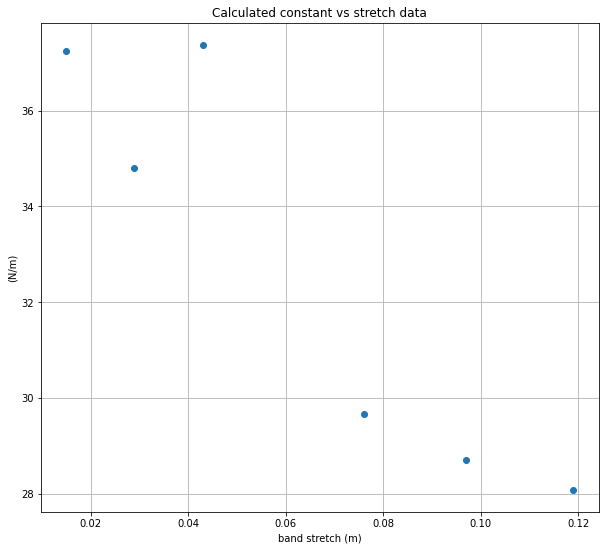

In [224]:
# create a figure with a set of axes as we did with histograms
fig1, ax1 = plt.subplots()

stretch_list.pop(0)

# scatter plot data set 1
ax1.scatter(stretch_list, constant_list)

# set up labels and titles for the plot and turn on the grid lines
ax1.set(xlabel='band stretch (m)', ylabel='(N/m)',
       title='Calculated constant vs stretch data')
ax1.grid()

# Set the size of my plot for better visibility
fig1.set_size_inches(10, 9)
plt.show()

### Plot discussion 

Seeing this plot I'm realizing something. I think I have been thinking of something wrong here. Right now as the stretch increases, the force constant of the band N/m is decreasing. I think I'm one step too deep here. I should be trying to find the bands force in just Newtons per unit of displacement, however instead I have N/m depending on the length of the rubber band. 

I have been working towards finding this constant of hook's law which I beleive would be the slope of the regression line for a plot of the **force vs. displacment (x-axis: Force N, y-axis: band displacement).**

### Meaning of decreasing constant based on displacement?

The constant of the band is decreasing as the displacement increases, this means we must have an inverse proportion that as the band reaches max stretch it the **smallest** spring constant.

So when the band only stretch 1.5cm with the first weight added, it had the highest constant! From there the constant decresed as displacement decresed.

This seems to imply that if the constant is **highest** at first then the band is the **most** "stiff" at the beginning and less "stiff" at the end.

### Final Thoughts

I took an interesting path to arrive at some conclusions about hook's law. The biggest question right now is what exactly is "stiffness" and how does that relate to a high constant having high stiffness. 

If I started this over again specifically calculate and plot force vs displacment and make inferences about the constant using the proportional relationship between force and displacement.